In [1]:
!pip install librosa
!pip install sounddevice
!pip install pydub
!pip install torch
!pip install tensorflow
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alisea\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alisea\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alisea\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alisea\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alisea\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alisea\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [34]:
import os
import torch
import numpy as np
import librosa
from scipy.io import wavfile
from scipy import fft
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [35]:
# Define paths and parameters
DATASET_PATH = "LA/ASVspoof2019_LA_train/flac"
LABEL_FILE_PATH =  "LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt" 
NUM_CLASSES = 2  # Number of classes (bonafide and spoof)
SAMPLE_RATE = 16000  # Sample rate of your audio files
DURATION = 5  # Duration of audio clips in seconds
N_MELS = 128  # Number of Mel frequency bins

# LOADING DATSET

In [3]:
labels = {}

with open(LABEL_FILE_PATH, 'r') as label_file:
    lines = label_file.readlines()

for line in lines:
    parts = line.strip().split()
    file_name = parts[1]
    label = 1 if parts[-1] == "bonafide" else 0
    labels[file_name] = label

X = []
y = []

max_time_steps = 109  # Define the maximum time steps for your model

###TO CHANGE
prova = {}
prova_audio = []

In [4]:
print(len(labels.items()))

25380


In [5]:
for i in range(0, 5500):
    line = lines[i] 
    parts = line.strip().split()
    file_name = parts[1]
    prova[file_name] = labels[file_name] 

In [6]:
counter = 0
file_path_list = []
for file_name, label in prova.items():
    file_path = os.path.join(DATASET_PATH, file_name + ".flac")
    file_path_list.append(file_path)

    # Load audio file using librosa
    audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
    
    # Extract Mel spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Ensure all spectrograms have the same width (time steps)
    if mel_spectrogram.shape[1] < max_time_steps:
        mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, max_time_steps - mel_spectrogram.shape[1])), mode='constant')
    else:
        mel_spectrogram = mel_spectrogram[:, :max_time_steps]

    # # Ensure all spectrograms have the same width (time steps)
    # if len(audio) < max_time_steps:
    #     audio = np.pad(audio, ((0, 0), (0, max_time_steps - len(audio))), mode='constant')
    # else:
    #     audio = audio[ :max_time_steps]
    
    if counter%(len(prova.items())/5)==0:
        print(f'we are at the {counter} iteration')
    counter = counter + 1

    # X.append(mel_spectrogram)
    prova_audio.append(audio)
    y.append(label)


we are at the 0 iteration
we are at the 1100 iteration
we are at the 2200 iteration
we are at the 3300 iteration
we are at the 4400 iteration


# PREPROCESSING OF SIGNAL

### Spectogram

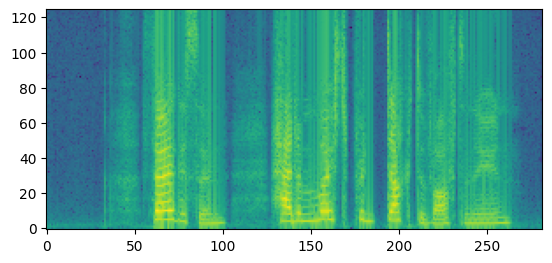

In [50]:
# Spectogram
rate = SAMPLE_RATE
# rate=48000, data.shape=(46447, 2) ~ almost 1s of stereo signal
data = prova_audio[1]

# Spectrogram estimation:
N = 250
S = []
for k in range(0, data.shape[0]+1, N):
    x = fft.fftshift(fft.fft(data[k:k+N], n=N))[N//2:N]
    # assert np.allclose(np.imag(x*np.conj(x)), 0)
    Pxx = 10*np.log10(np.real(x*np.conj(x)))
    S.append(Pxx)
S = np.array(S)

# Frequencies:
f = fft.fftshift(fft.fftfreq(N, d=1/rate))[N//2:N]

# Spectrogram rendering:
plt.imshow(S.T, origin='lower')

In [11]:
def plot_spect_from_sig_time(data, rate, n=250):    
    # Spectrogram estimation:
    N = n
    S = []
    for k in range(0, data.shape[0]+1, N):
        x = fft.fftshift(fft.fft(data[k:k+N], n=N))[N//2:N]
        # assert np.allclose(np.imag(x*np.conj(x)), 0)
        Pxx = 10*np.log10(np.real(x*np.conj(x)))
        S.append(Pxx)
    S = np.array(S)
    
    # Frequencies:
    f = fft.fftshift(fft.fftfreq(N, d=1/rate))[N//2:N]
    
    # Spectrogram rendering:
    plt.imshow(S.T, origin='lower')

### plot audio in time

In [7]:
# prompt: a defintiizion that plot the audio

import librosa
import os
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from IPython.display import display, Audio

# ... (rest of the code from the previous response) ...

def listen_to_audio(y, sr):
    """Plays the audio file."""
    display(Audio(y, rate=sr))

def plot_audio(y, sr):
  """Plots the waveform and spectrogram of an audio signal.

  Args:
      y: The audio time series.
      sr: The sampling rate of y.
  """
  plt.figure(figsize=(12, 6))

  # Plot the waveform
  plt.subplot(2, 1, 1)
  librosa.display.waveshow(y, sr=sr)
  plt.title("Waveform")

  # # Plot the spectrogram
  # plt.subplot(2, 1, 2)
  # D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  # librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
  # plt.colorbar(format='%+2.0f dB')
  # plt.title('Spectrogram')

  plt.tight_layout()
  plt.show()



### My experiment

### the effective code to get the silence

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# global envelope

def custom_waveshow(y, sr=22050, max_points=11025, axis='time', offset=0.0, **kwargs):
    """
    Custom implementation of librosa.display.waveshow.
    
    Parameters:
    - y (ndarray): The audio signal (1D array).
    - sr (int): Sampling rate of the signal.
    - max_points (int): Maximum number of points for sample-based view.
    - axis (str): Units for the x-axis ('time' for seconds).
    - offset (float): Offset start time for the waveform.
    - **kwargs: Additional keyword arguments for matplotlib.
    
    Returns:
    - None
    """    
    envelope = 0
    # Determine the total duration of the audio
    duration = len(y) / sr  # in seconds
    
    # Time axis for the waveform
    time = np.arange(len(y)) / sr + offset

    # Adaptive rendering: Check if the plot duration is short
    if duration <= max_points / sr:
        # Detailed sample-based view
        # envelope = y
        plt.step(time, y, where="post", **kwargs)
    else:
        # Downsample for amplitude envelope
        downsample_factor = max(1, len(y) // max_points)
        
        # Compute the amplitude envelope
        
        envelope = uniform_filter1d(np.abs(y), size=downsample_factor)
        envelope_time = time[::downsample_factor]  # Time for downsampled points

        # Plot amplitude envelope
        # Remove 'alpha' from kwargs if present to avoid conflict
        
        fill_between_kwargs = kwargs.copy()  
        fill_between_kwargs.pop('alpha', None)  # Remove 'alpha' if it exists

        # plt.fill_between(
        #     envelope_time,
        #     envelope[::downsample_factor],
        #     -envelope[::downsample_factor],
        #     alpha=0.6, #This may be causing a conflict
        #     **fill_between_kwargs, #Use the modified kwargs without 'alpha' here.
        # )
    
    # # Set axis labels and limits
    # if axis == 'time':
    #     plt.xlabel("Time (s)")
    # elif axis == 'frames':
    #     plt.xlabel("Frames")
    # plt.ylabel("Amplitude")

    # # Add grid for better readability
    # plt.grid(True)
    return envelope

def extract_silence_from_audio(y, sr, threshold):
    amplitude = custom_waveshow(y, sr=sr, max_points=11025, color="blue", alpha=0.8)
    tmp = amplitude
    sil = np.zeros(len(tmp))
    counter = 0
    for i in range(0, len(tmp)):
      if tmp[i] < threshold:
        sil[counter] = tmp[i]
        counter = counter + 1
    C = sil[:counter]
    return C


In [9]:
a = prova_audio[3]
print(y)
# if type(y)==int:
#     print('ok')
q = custom_waveshow(a, sr=22050, max_points=11025, color="blue", alpha=0.8)

[4.5776367e-04 5.1879883e-04 4.8828125e-04 ... 9.1552734e-05 2.1362305e-04
 2.1362305e-04]


In [10]:
po = extract_silence_from_audio(a, SAMPLE_RATE, 0.02)


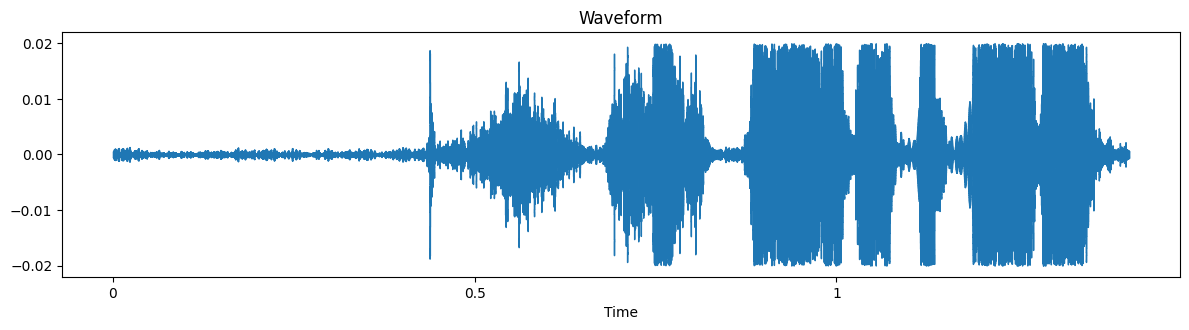

In [11]:
plot_audio(po, sr = SAMPLE_RATE)
listen_to_audio(po, sr = SAMPLE_RATE)

In [26]:
def filter_noise(audio_chunk, treshold=0.001):
    tmp_audio = audio_chunk
    for i in range(0,len(audio_chunk)):
        if np.abs(audio_chunk[i]) >= treshold:
            tmp_audio[i] = 0
            
    return tmp_audio         

# NN

we are at iteration 0
we are at iteration 500
we are at iteration 1000
we are at iteration 1500
we are at iteration 2000
we are at iteration 2500
Error: object of type 'int' has no len()
2601
Error: object of type 'int' has no len()
2782
we are at iteration 3000
we are at iteration 3500
we are at iteration 4000
we are at iteration 4500
we are at iteration 5000
here
6165


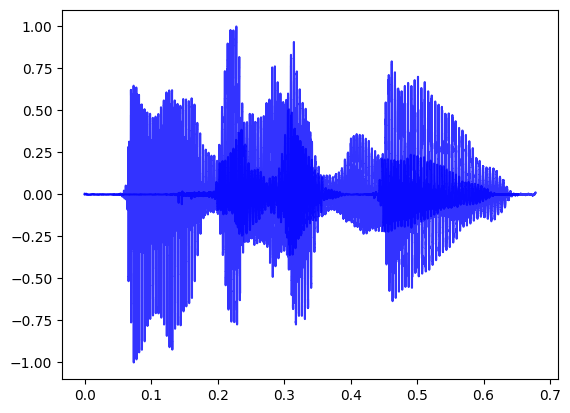

In [21]:
X = []
cut_value = []
min = 500000
count = 0
for audio in prova_audio:
    try:
        if count%500 == 0:
            print(f'we are at iteration {count}')
        silence = extract_silence_from_audio(audio, SAMPLE_RATE, 0.1)
        if len(silence) < min:
            min = len(silence)
        X.append(silence)
        count = count + 1
    except TypeError as e:
        print(f"Error: {e}")
        cut_value.append(count)
        print(count)
# fare il padding
count = 0
for i in X:
    if len(i) > min:
        X[count] = i[:min]
    else:
        X[count] = np.pad(i, (0, min-len(i)), mode='constant')
    count = count + 1
print('here')
# cut_value = [2601, 2782]
for i in range(len(cut_value)-1, -1, -1):
    y.remove(y[cut_value[i]])

print(min)

In [50]:
X = []
cut_value = []
max = 0
for audio in prova_audio:
    if count%500 == 0:
        print(f'we are at iteration {count}')
    try:
        if len(audio)==1:
            print('we are fucked')
        if count%500 == 0:
            print(f'we are at iteration {count}')
        silence = extract_silence_from_audio(audio, SAMPLE_RATE, 0.1)
        if len(silence) > max:
            max = len(silence)
        X.append(silence)
        count = count + 1
    except TypeError as e:
        print(f"Error: {e}")
        cut_value.append(count)
        print(count)

# fare il padding
count = 0
for i in X:
    if len(i) < max:
        X[count] = np.pad(i, (0, max - len(i)), mode='constant')
    else:
        X[count] = i[:max]
        
    count = count + 1
    
for i in range(len(cut_value)-1, -1, -1):
    y.remove(y[cut_value[i]])

prova_x = np.array(X)
print(len(X[2]))

TypeError: 'int' object is not callable

In [ ]:
plot_audio_in_time(prova_x[1], SAMPLE_RATE)
print(min)

In [36]:
print(len(X))
print(len(y))
X = np.array(X)
y = np.array(y)


5498
5498


# CNN

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix

# Define 1D CNN for Silent Amplitude Analysis
class SilenceAnalysisCNN1D(nn.Module):
    def __init__(self, input_channels, sequence_length, num_classes):
        super(SilenceAnalysisCNN1D, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv1d(input_channels, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Calculate the size of the flattened feature map
        self.flattened_size = (sequence_length // 8) * 64

        # Fully connected layers
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

        # Activation functions
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass through convolutional layers + ReLU + pooling
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))

        # Flatten the feature map
        x = x.view(x.size(0), -1)

        # Pass through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)

        return x

# Hyperparameters
input_channels = 1    # Single channel (amplitude)
sequence_length = min # Length of silent amplitude sequence
num_classes = 2        # Number of classes (real or fake)
learning_rate = 0.001
batch_size = 32
epochs = 10

# Reshape input data to [Batch_Size, Channels, Sequence_Length]

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1, sequence_length)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = SilenceAnalysisCNN1D(input_channels, sequence_length, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    all_preds = []
    all_targets = []

    for batch_X, batch_y in data_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

        # Store predictions for metrics
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_targets.extend(batch_y.numpy())

    # Compute metrics
    accuracy = accuracy_score(all_targets, all_preds)
    cm = confusion_matrix(all_targets, all_preds)

    # Print epoch metrics
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(data_loader):.4f}, Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")


Epoch [1/10], Loss: 0.4329, Accuracy: 0.8829
Confusion Matrix:
[[2716  202]
 [ 442 2138]]

Epoch [2/10], Loss: 0.3167, Accuracy: 0.9976
Confusion Matrix:
[[2913    5]
 [   8 2572]]

Epoch [3/10], Loss: 0.3159, Accuracy: 0.9978
Confusion Matrix:
[[2914    4]
 [   8 2572]]

Epoch [4/10], Loss: 0.3346, Accuracy: 0.9776
Confusion Matrix:
[[2821   97]
 [  26 2554]]

Epoch [5/10], Loss: 0.3151, Accuracy: 0.9982
Confusion Matrix:
[[2916    2]
 [   8 2572]]

Epoch [6/10], Loss: 0.3147, Accuracy: 0.9987
Confusion Matrix:
[[2918    0]
 [   7 2573]]

Epoch [7/10], Loss: 0.3146, Accuracy: 0.9987
Confusion Matrix:
[[2918    0]
 [   7 2573]]

Epoch [8/10], Loss: 0.3145, Accuracy: 0.9987
Confusion Matrix:
[[2918    0]
 [   7 2573]]

Epoch [9/10], Loss: 0.3145, Accuracy: 0.9987
Confusion Matrix:
[[2918    0]
 [   7 2573]]

Epoch [10/10], Loss: 0.3145, Accuracy: 0.9987
Confusion Matrix:
[[2918    0]
 [   7 2573]]



In [38]:
# Save the state dictionary
torch.save(model.state_dict(), "silence_detection_cnn.pth")
print("Model state dictionary saved.")


Model state dictionary saved.


# test set

In [41]:
import torch
# Instantiate the model architecture
model = SilenceAnalysisCNN1D(input_channels, sequence_length, num_classes)

# Load the saved state dictionary into the model
model.load_state_dict(torch.load("silence_detection_cnn.pth", weights_only=True))

print("Model state dictionary loaded.")


Model state dictionary loaded.


In [63]:
# Load the model and preprocess test data (similar to training data preprocessing)
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define paths and parameters
TEST_DATASET_PATH = "LA/ASVspoof2019_LA_eval/flac"
MODEL_PATH = "silence_analysis_cnn.pth"  # Replace with the actual path to your saved model
SAMPLE_RATE = 16000

we are at iteration 0
we are at iteration 500
we are at iteration 1000
we are at iteration 1500
we are at iteration 2000
we are at iteration 2500
Error: object of type 'int' has no len()
2601
Error: object of type 'int' has no len()
2782
we are at iteration 3000
we are at iteration 3500
we are at iteration 4000
we are at iteration 4500
we are at iteration 5000
we are at iteration 5500
we are at iteration 6000
we are at iteration 6500


KeyboardInterrupt: 

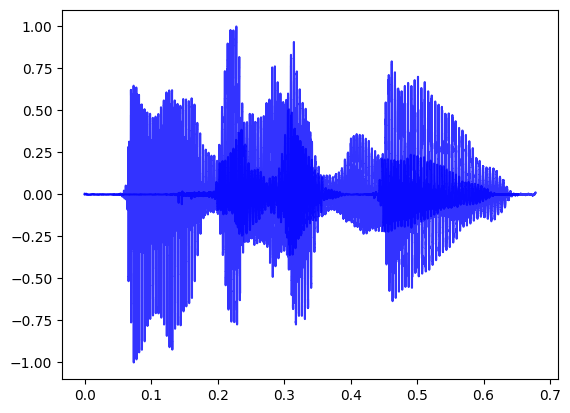

In [64]:
# Load and preprocess test data using librosa
X_test = []
cut_value = []
min = 500000
count = 0

test_files = os.listdir(TEST_DATASET_PATH)
for file_name in test_files[:5000]:
    file_path = os.path.join(TEST_DATASET_PATH, file_name)

    # Load audio file using librosa
    audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
    
    for audio in prova_audio:
        try:
            if count%500 == 0:
                print(f'we are at iteration {count}')
            silence = extract_silence_from_audio(audio, SAMPLE_RATE, 0.1)
            if len(silence) < min:
                min = len(silence)
            X_test.append(silence)
            count = count + 1
        except TypeError as e:
            print(f"Error: {e}")
            cut_value.append(count)
            print(count)
# fare il padding
count = 0
for i in X_test:
    if len(i) > min:
        X_test[count] = i[:min]
    else:
        X_test[count] = np.pad(i, (0, min-len(i)), mode='constant')
    count = count + 1
print(min)

# Convert list to numpy array
X_test = np.array(X_test)

In [65]:
# Path to the ASVspoof 2019 protocol file
PROTOCOL_FILE_PATH =  "LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl"

labels = {}

with open(LABEL_FILE_PATH, 'r') as label_file:
    lines = label_file.readlines()

for line in lines:
    parts = line.strip().split()
    file_name = parts[1]
    label = 1 if parts[-1] == "bonafide" else 0
    labels[file_name] = label

true_labels = []
for _, label in labels.items():
    true_labels.append(label)


In [66]:
true_labels = true_labels[:len(X_test)]
print(min)

6165


In [67]:
# cut_value = [2601, 2782]
for i in range(len(cut_value)-1, -1, -1):
    true_labels.remove(true_labels[cut_value[i]])

In [70]:
from keras.preprocessing.sequence import pad_sequences

# Define the expected sequence length
sequence_length = 48103

# Pad or truncate sequences in X_test to match the expected sequence length
X_test_padded = pad_sequences(X_test, maxlen=sequence_length, padding='post', truncating='post')

# Now the sequences in X_test_padded will all have the same length (48103)
print(f"Shape of padded X_test: {X_test_padded.shape}")


Shape of padded X_test: (6531, 48103)


In [73]:
y_true = np.array([1 if label == "bonafide" else 0 for label in true_labels]) # y_true are the true labels for each file

X_test_tensor = torch.tensor(X_test_padded, dtype=torch.float32).view(-1, 1, sequence_length)
y_test_tensor = torch.tensor(y_true, dtype=torch.long)


model.eval()  # Set the model to evaluation mode
# Forward pass through the model

with torch.no_grad():  # Disable gradient computation
    outputs = model(X_test_tensor)  # Get model predictions
    _, y_pred = torch.max(outputs, 1)  # Get the predicted class indices

# Convert probabilities to predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 20106284352 bytes.

In [74]:
# CONFUSION MATRIX

cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
classes = ["spoof", "bonafide"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# ROC Curve

from sklearn.metrics import roc_curve, auc

# Predict using the loaded model
y_pred = model.predict(X_test)

# Get the predicted probabilities for the positive class
y_pred_prob = y_pred[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_pred_classes' is not defined